# IPCV: Übung 1

### Übung von adrian.willi@stud.hslu.ch

## Intro: Einführung in OpenCV mit python

### Installation OpenCV:

OpenCV kann am einfachsten mit dem python installer pip installiert werden. Je nach Umgebung oder aufgesetzter python Version ist das `pip` oder `pip3`. Wir werden in der Vorlesung mit python Version 3.5 (oder später) arbeiten.

    pip install opencv-contrib-python

oder 

    pip3 install opencv-contrib-python

Dies installiert sowohl die python Bindings für OpenCV, wie auch die eigentliche OpenCV Bibliothek.

### Dokumentation
- Documentation von OpenCV gibt es auf: https://docs.opencv.org/3.4.0/
- Dokumentation von Python, numpy oder matplotlib sollte Über das Help Menu in Jupyter erreichbar sein



### Verwendung
Um OpenCV in Python verwenden zu können muss die Bibliothek importiert werden. Für Berechnungen und Darstellung brauchen wir auch noch numpy und matplotlib:

In [1]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter
import matplotlib as mpl
from matplotlib import pyplot as plt

# this makes the images a bit larger
mpl.rcParams['figure.dpi']= 200
plt.rcParams["figure.figsize"] = (10,20)

# plots directly in the notebook
%matplotlib inline 

# if you have a high-dpi monitor
%config InlineBackend.figure_format = 'retina' 

### Bilder lesen

Für einige Operationen gibt es sowohl in OpenCV wie auch in anderen Python Bibliotheken implementationen. Zum Beispiel zum Lesen von Bildern. Wir werden, wenn immer möglich zuerst die OpenCV Implementation verwenden.

Ein Bild kann mit dem OpenCV Befehl `imread` gelesen werden:

In [3]:
image = cv2.imread('images/lena_std.tif')

OpenCV hat auch die Möglichkeit ein Fenster zu öffnen und ein Bild darin darzustellen. Innerhalb jupyter (i.e. im Browser) funktioniert dies aber im Allgemeinen nicht. Wir können aber ein Bild mit der Matplotlib Bibliothek darstellen.

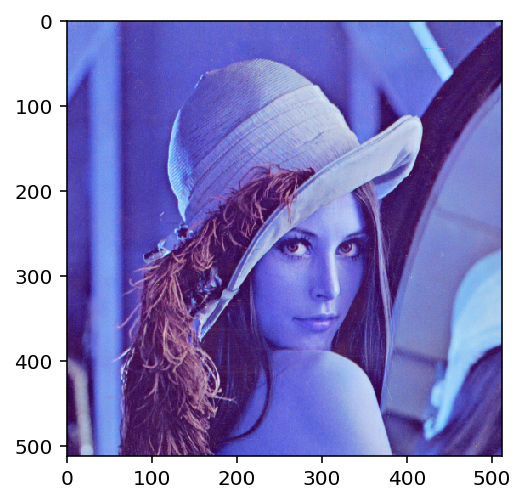

In [4]:
plt.imshow(image)
plt.show()

Wie wir sehen, sieht das Bild aber falsch aus. Das liegt daran, dass OpenCV das Bild in BGR Format liest, die meisten anderen Bibliotheken aber RGB erwarten. Wir können das Bild entsprechend konvertieren und nochmals darstellen.

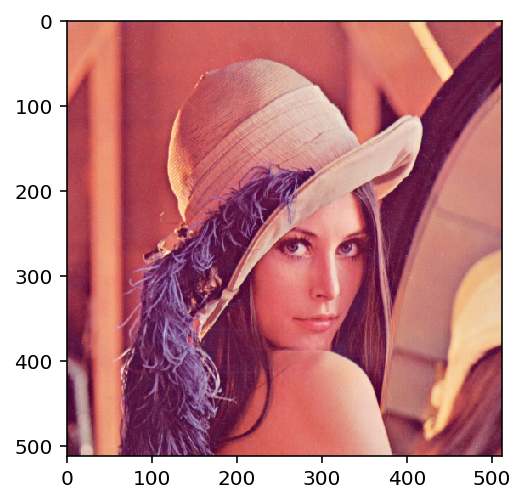

In [5]:
image_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [6]:
print(image_rgb[0, 0, 0])
print(image_rgb[0,0])

226
[226 137 125]


Es können auch direkt Bereiche angesprochen werden. Dies setzt ein Teil des Bildes auf weiss:


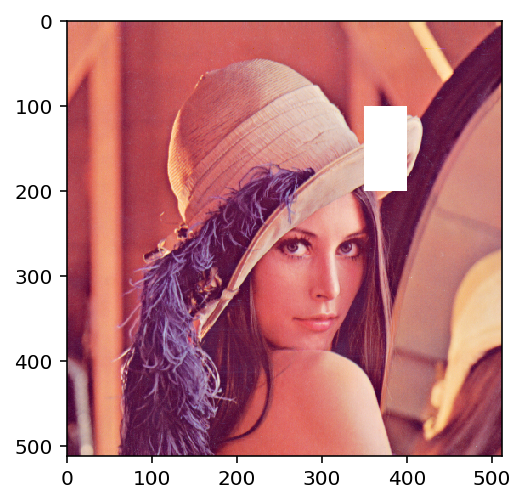

In [7]:
image_rgb[100:200, 350:400] = [255, 255, 255]
plt.imshow(image_rgb)

Schauen Sie sich dazu in der numpy Dokumentation die Möglichkeiten der Indexierung an. Eine Übesicht über numpy Operationen gibt es auch auf

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

Beachten Sie das die erste Koordinate in der Indexierung der Reihe im numpy Array entspricht, i.e. der y Koordinate im Bild.

Mit numpy Arrays kann auch ein Boolean Array als Index verwendet werden, ausserdem sind Operationen direkt auf einem ganzen Array möglich. Um zum Beispiel alle Pixel die eine Helligkeit kleiner als 100 haben, auf Schwarz zu setzen:


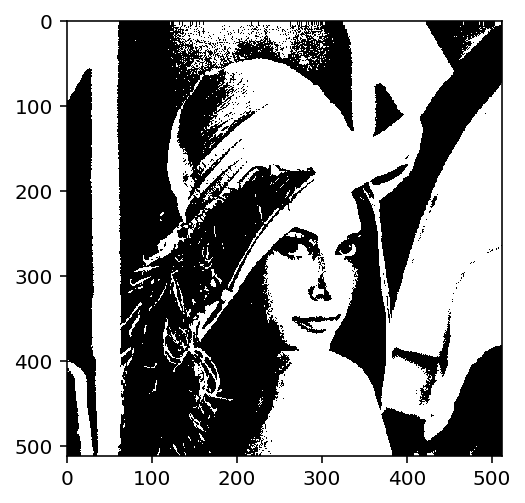

In [8]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_map = image_grey <= 128

image_rgb[threshold_map] = [0, 0, 0]
image_rgb[image_grey > 128] = [255, 255, 255]

plt.imshow(image_rgb)

## Aufgabe 1: Bildmanipulationen mit OpenCV und numpy 

### Einführung

In dieser Übung sollen einfache Bildoperationen mit OpenCV und numpy durchgeführt werden.


### Aufgabe 1: Laden und Darstellung von Bildern

Laden sie ein Bild wie oben, konvertieren sie es nach RGB und stellen Sie es dar. Sie können das gleiche, oder ein anderes Bild verwenden.

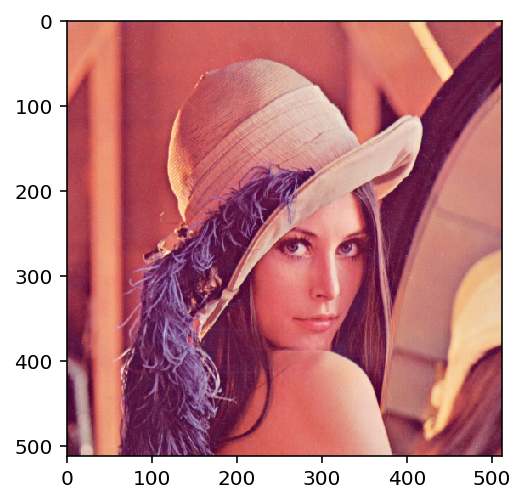

In [9]:
image = cv2.imread('images/lena_std.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

#### Spiegelung mit OpenCV

Spiegeln sie das Bild an der vertikalen und horizontalen Achse unter Benutzung von Funktionen aus OpenCV und stellen Sie die Bilder dar.

<h4>Bemerkungen</h4>
Die Funktion cv2.flip(image, number) nimmt zwei Parameter entgegen. Nebst dem Bild können mit folgenden Angaben die Richtung der Spiegelung angegeben werden:

<ul>
    <dt> 0, for flipping the image around the x-axis (vertical flipping) </dt>
    <dt> &gt; 0 for flipping around the y-axis (horizontal flipping) </dt>
    <dt> &lt; 0 for flipping around both axes </dt>
</ul>
    
  

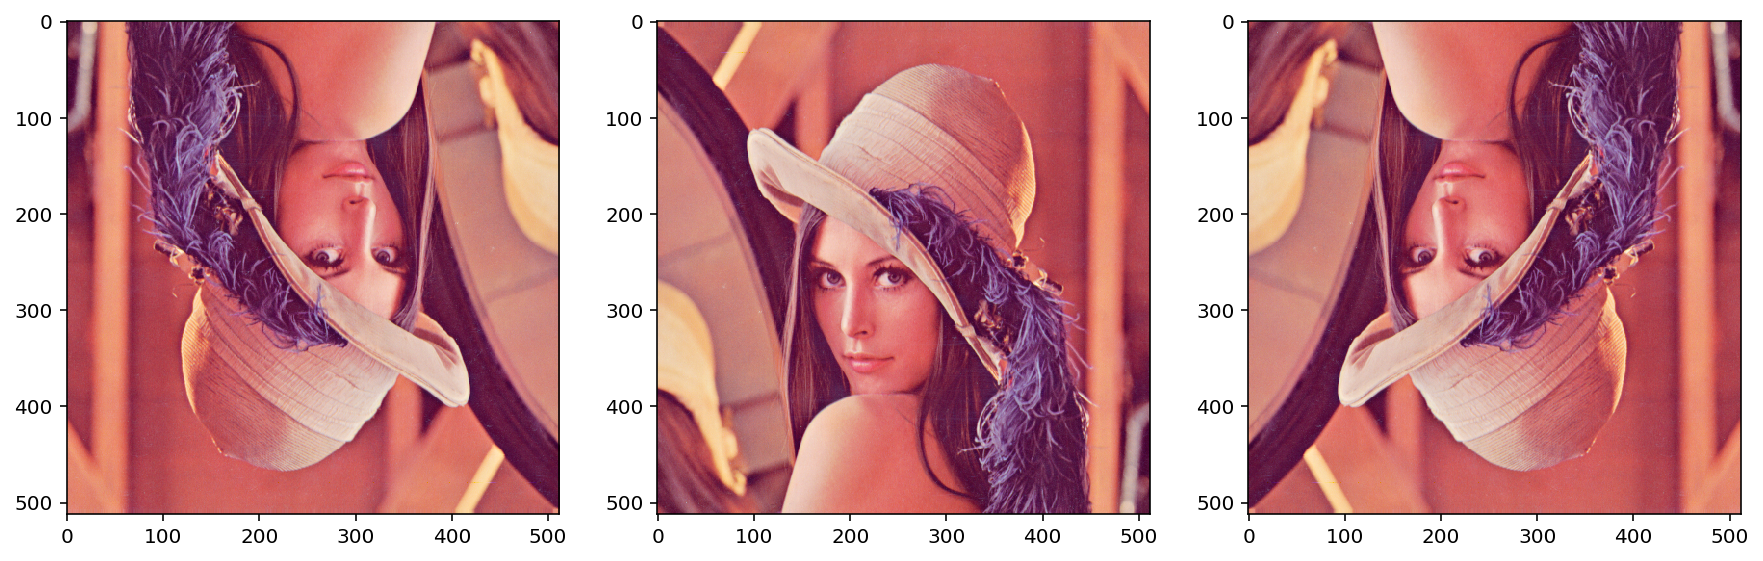

In [10]:
image_mirror_vert = cv2.flip(image, 0)
image_mirror_hor = cv2.flip(image, 1)
image_mirror_both = cv2.flip(image, -1)
plt.figure(figsize=(15,  10))
plt.subplot(1, 3, 1)
plt.imshow(image_mirror_vert)
plt.subplot(1, 3, 2)
plt.imshow(image_mirror_hor)
plt.subplot(1, 3, 3)
plt.imshow(image_mirror_both)


plt.show()

#### Spiegeln mit numpy

Sie können Bilder auch direkt mit numpy Befehlen verändern. Können sie sie auch damit spiegeln?

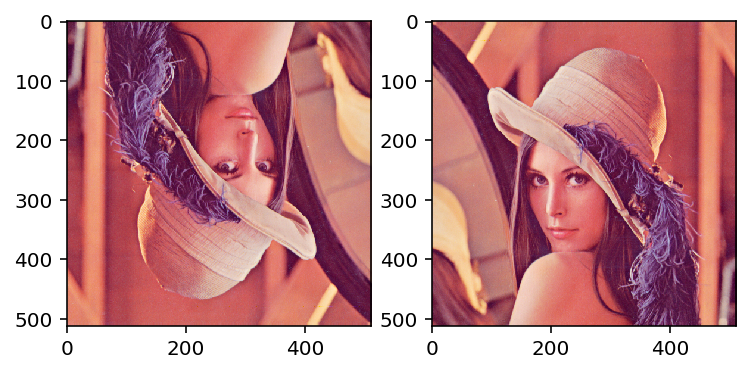

In [11]:
plt.subplot(1,2,1)
plt.imshow(np.flip(image, 0))
plt.subplot(1,2,2)
plt.imshow(np.flip(image,1))
plt.show()

### Aufgabe 2: Darstellung von Grauwert Bilder
Konvertieren Sie das Bild in ein Grauwert Bild und stellen Sie dieses dar. Per default wird ein 1-Kanal Bild farbig mit einer default Color Map dargestellt. Um das Bild wirklich in grau zu zeichnen kann der Parameter `cmap='gray'` für `imshow` mitgegeben werden.

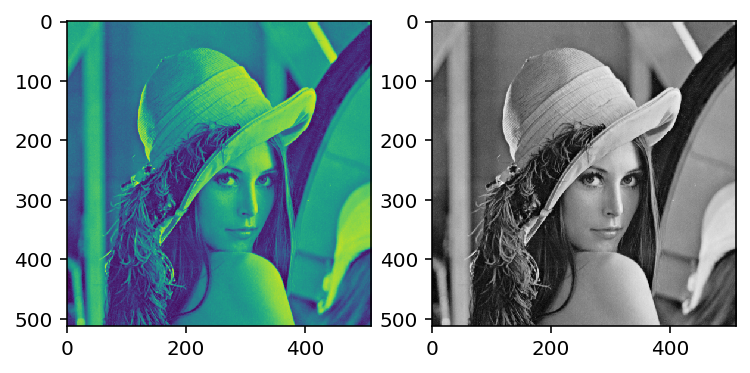

In [12]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.subplot(1,2,1)
plt.imshow(image_gray)
plt.subplot(1,2,2)
plt.imshow(image_gray, cmap='gray')
plt.show()


### Aufgabe 3: Bild Kanäle
Stellen Sie die Anteile des rot, grün und blau Kanals einzeln (als Grauwert Bild) dar. Mit subplot können sie verschiedene Bilder neben- oder untereinander darstellen.

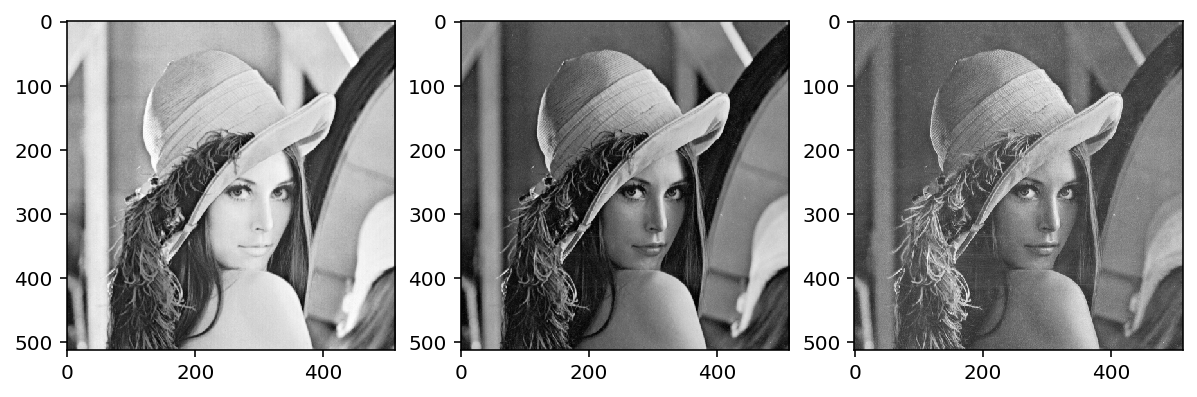

In [13]:
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(image_red, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(image_green, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(image_blue, cmap='gray')
plt.show()
    

Erstellen Sie nun wieder ein Farbbilder aus den 3 Kanälen, sie können die Kanäle auch anders mischen. Verwenden Sie die numpy Funktion `stack`.

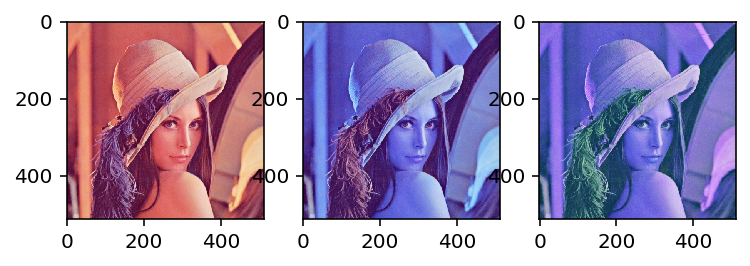

In [14]:
image_new = np.stack([image_red, image_green, image_blue], axis=2)
plt.subplot(1,3,1)
plt.imshow(image_new)
image_new_mixed = np.stack([image_blue, image_green, image_red], axis=2)
plt.subplot(1,3,2)
plt.imshow(image_new_mixed)
image_new_mixed_totally = np.stack([image_green, image_blue, image_red], axis=2)
plt.subplot(1,3,3)
plt.imshow(image_new_mixed_totally)
plt.show()

### Aufgabe 4: Plot einer Zeile

Stellen Sie die Bildwerte der Zeile 200 des Grauwert Bildes als Plot dar. Dazu müssen sie die Pixelwerte einer Zeile auslesen wobei Sie wiederum ein (1D) numpy Array erhalten. Dieses kann mit `plt.plot(...)` dargestellt werden. Entspricht das Ergebnis den Erwartungen?

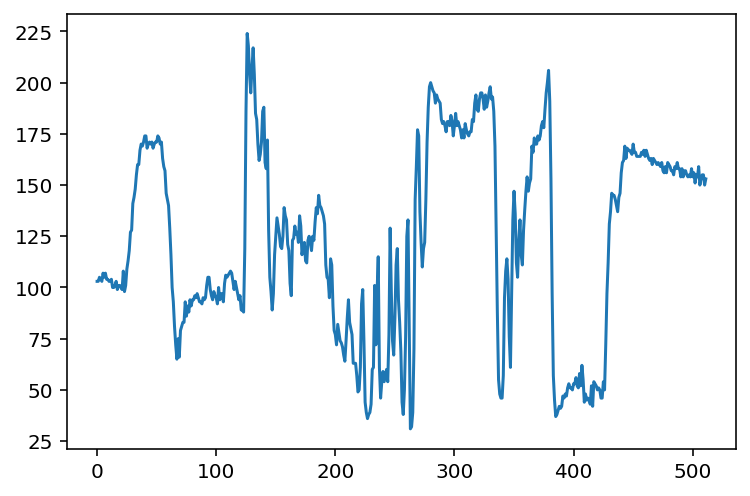

In [15]:
line_at_200 = image_gray[200]
plt.plot(line_at_200)
plt.show()

### Aufgabe 5: Histogramm und Histogramm Ausgleich

Das folgenden Bild hat einen schlechten Kontrast. Grauwert Bilder werden per default von OpenCV als 3-Kanal Bilder geladen. Was ist der minimale und maximale Pixelwert im Bild?

min: 74, max: 178


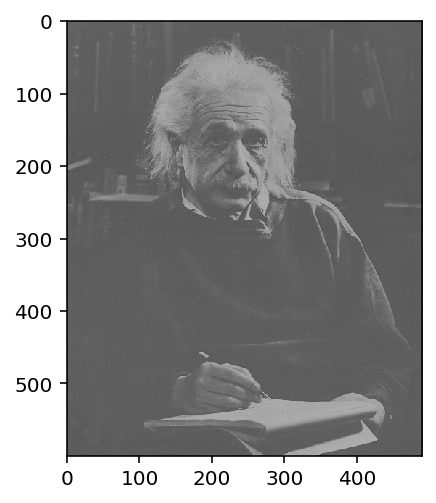

In [16]:
einstein = cv2.imread('images/EinsteinLowContrast.tif')
einstein_grey = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)
plt.imshow(einstein, cmap='gray')

min = einstein_grey.min()
max = einstein_grey.max()
print('min: {}, max: {}'.format(min, max))

Stellen Sie das Histogramm des Bildes dar. Benutzen Sie dazu die OpenCV Funktion `cv2.calcHist(...)`. Benutzen Sie die OpenCV Dokumentation um die Parameter der Funktion zu ermitteln.


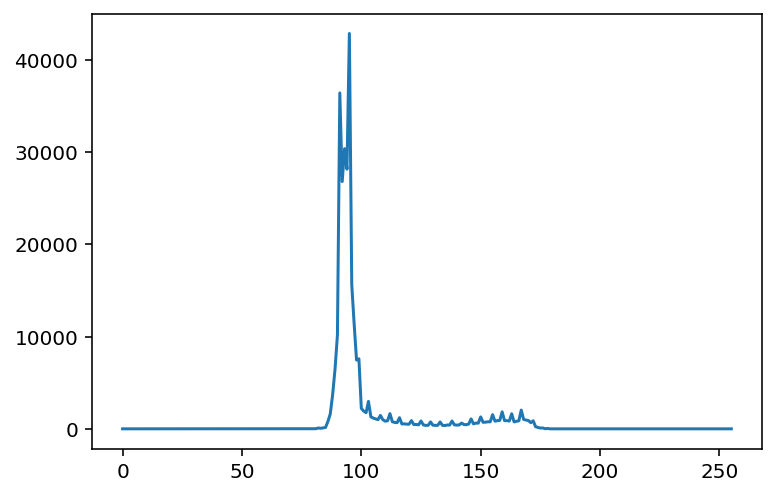

In [17]:
hist = cv2.calcHist([einstein_grey],[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist)
plt.show()

Führen Sie einen Histogram Ausgleich mit der Funktion `equalizeHist(...)` durch und stellen Sie das Bild und das Histogram des veränderten Bildes dar.

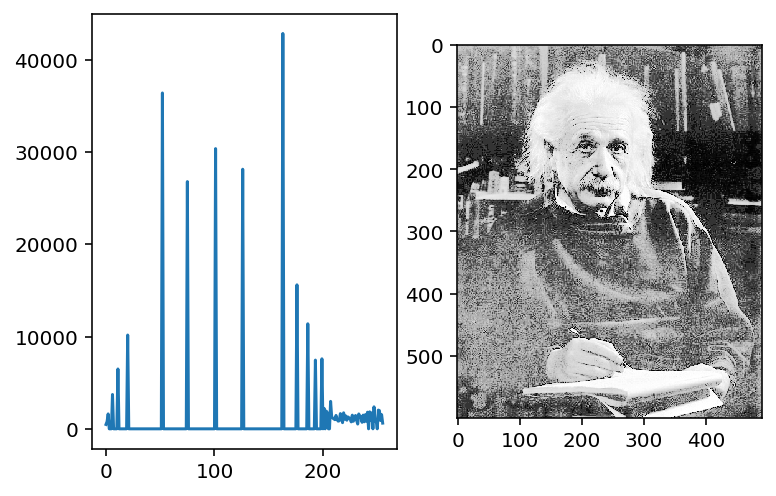

In [18]:
einstein_equal = cv2.equalizeHist(einstein_grey)
hist2 = cv2.calcHist([einstein_equal], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.subplot(1, 2, 1)
plt.plot(hist2)
plt.subplot(1, 2, 2)
plt.imshow(np.stack([einstein_equal, einstein_equal, einstein_equal], axis=2))
plt.show()

### Aufgabe 6: Punktbildfunktionen

In der nächsten Zelle ist eine Funktion definert, die als Eingabe ein Bild enthält, und ein verändertes Bild zurückgibt. Ändern Sie die Funktion, sodass das Bild heller (oder dunkler) wird.

In [9]:
def f(image, gamma):
    # change function to make pixesl brighter (or darker)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:,:,2] = image[:,:,2] + gamma
    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    
    
    return image

In [10]:
img = cv2.imread('images/EinsteinLowContrast.tif')
result_brigther = f(img, 50)
result_darker = f(img, -50)




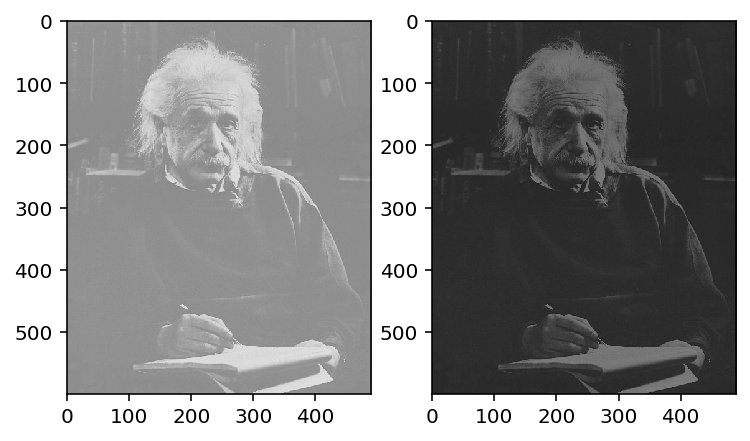

In [11]:
plt.subplot(1,2,1)
plt.imshow(result_brigther)
plt.subplot(1,2,2)
plt.imshow(result_darker)
plt.show()

## Beispiele für Thresholding

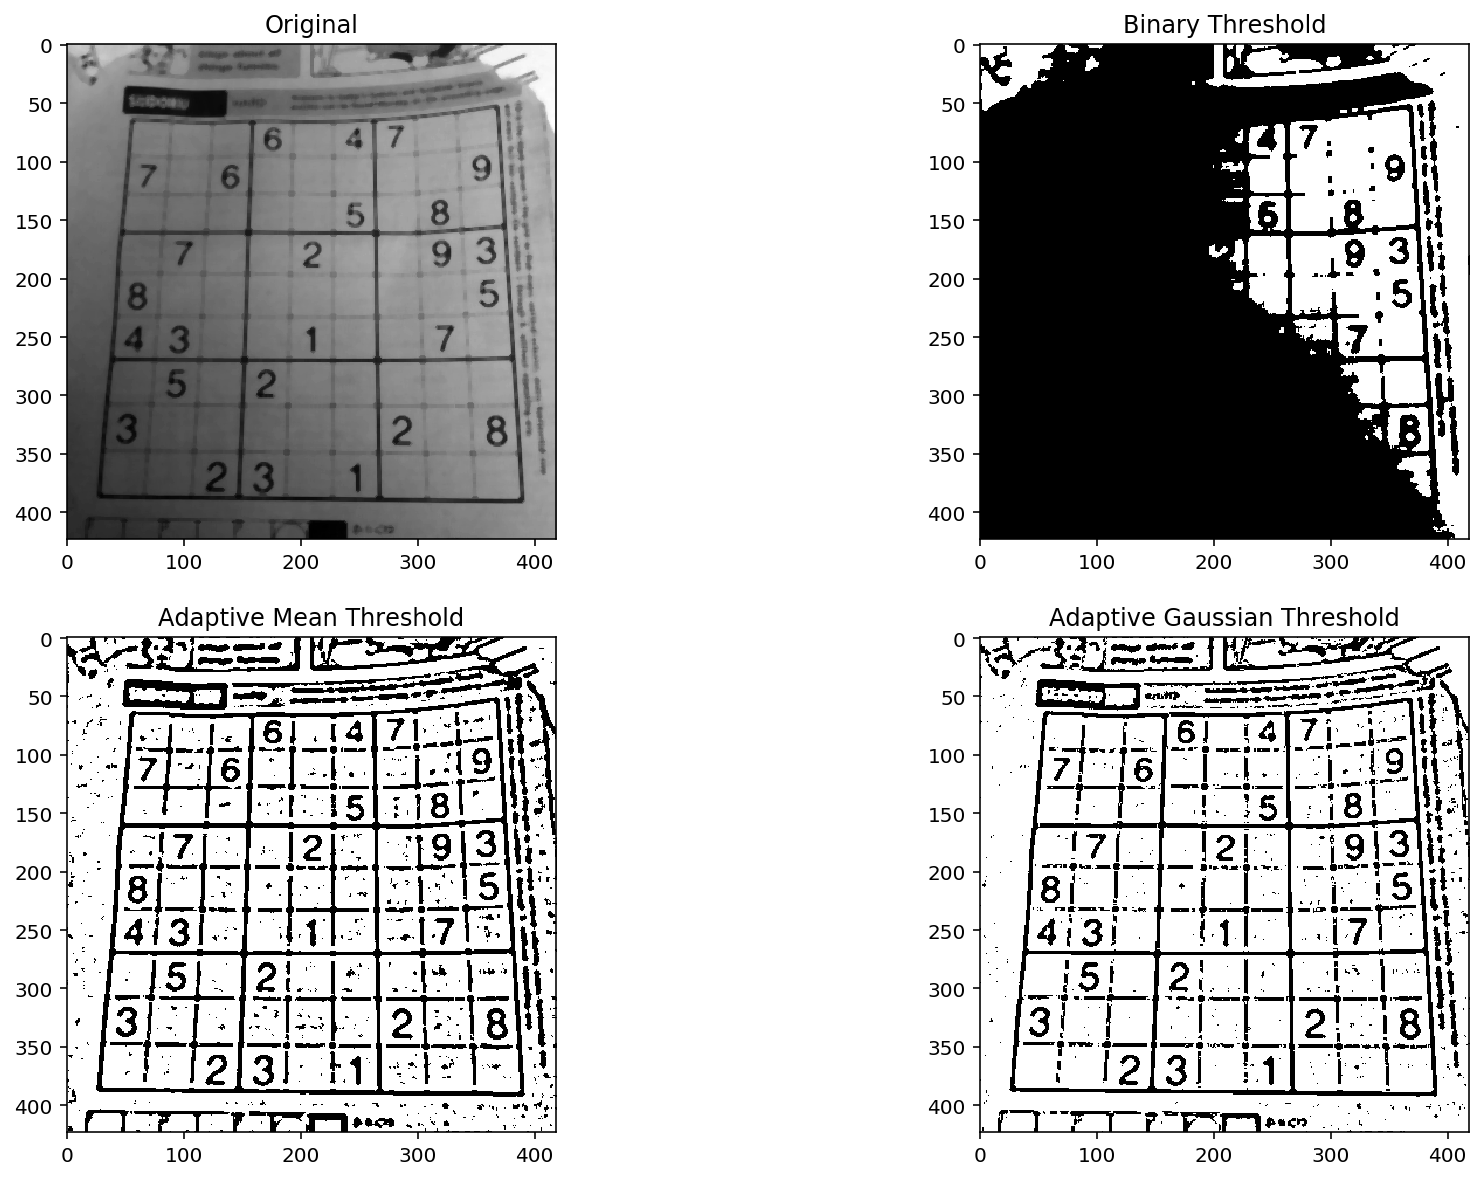

In [40]:
sudoku = cv2.imread('images/sudoku.jpg',0)
sudoku = cv2.medianBlur(sudoku, 5)
ret, sudoku_binary = cv2.threshold(sudoku, 127, 255, cv2.THRESH_BINARY)
sudoku_adaptive_mean = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
sudoku_adaptive_gauss = cv2.adaptiveThreshold(sudoku, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Original')
plt.imshow(sudoku, 'gray')
plt.subplot(222)
plt.title('Binary Threshold')
plt.imshow(sudoku_binary, 'gray')
plt.subplot(223)
plt.title('Adaptive Mean Threshold')
plt.imshow(sudoku_adaptive_mean, 'gray')
plt.subplot(224)
plt.title('Adaptive Gaussian Threshold')
plt.imshow(sudoku_adaptive_gauss, 'gray')
plt.show()

## Aufgabe 2: Morphologische Operationen

### Einführung

In dieser Aufgabe wollen wir morphologische Operationen in OpenCV betrachten.


In [22]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 200



### Aufgabe 2.1: Dilate and Erode

Morphologische Operationen werden typischerweise auf binären Bildern angewendet. (Die OpenGL Implementationen verwenden jeweils die Maximum Operationen zwischen Strukturelement und Bild, sodass die Operationen zumindest auch auf Grauwert Bildern durchgeführt werden können, ausserdem werden die Operationen auf allen Kanälen angewendet.)

Ein Beispiel Bild steht unter images/Figuren.png zur Verfügung. Typischerweise erhalten sie ein binäres Bild sonst mit einer Schwellwert (Threshold) Operation.

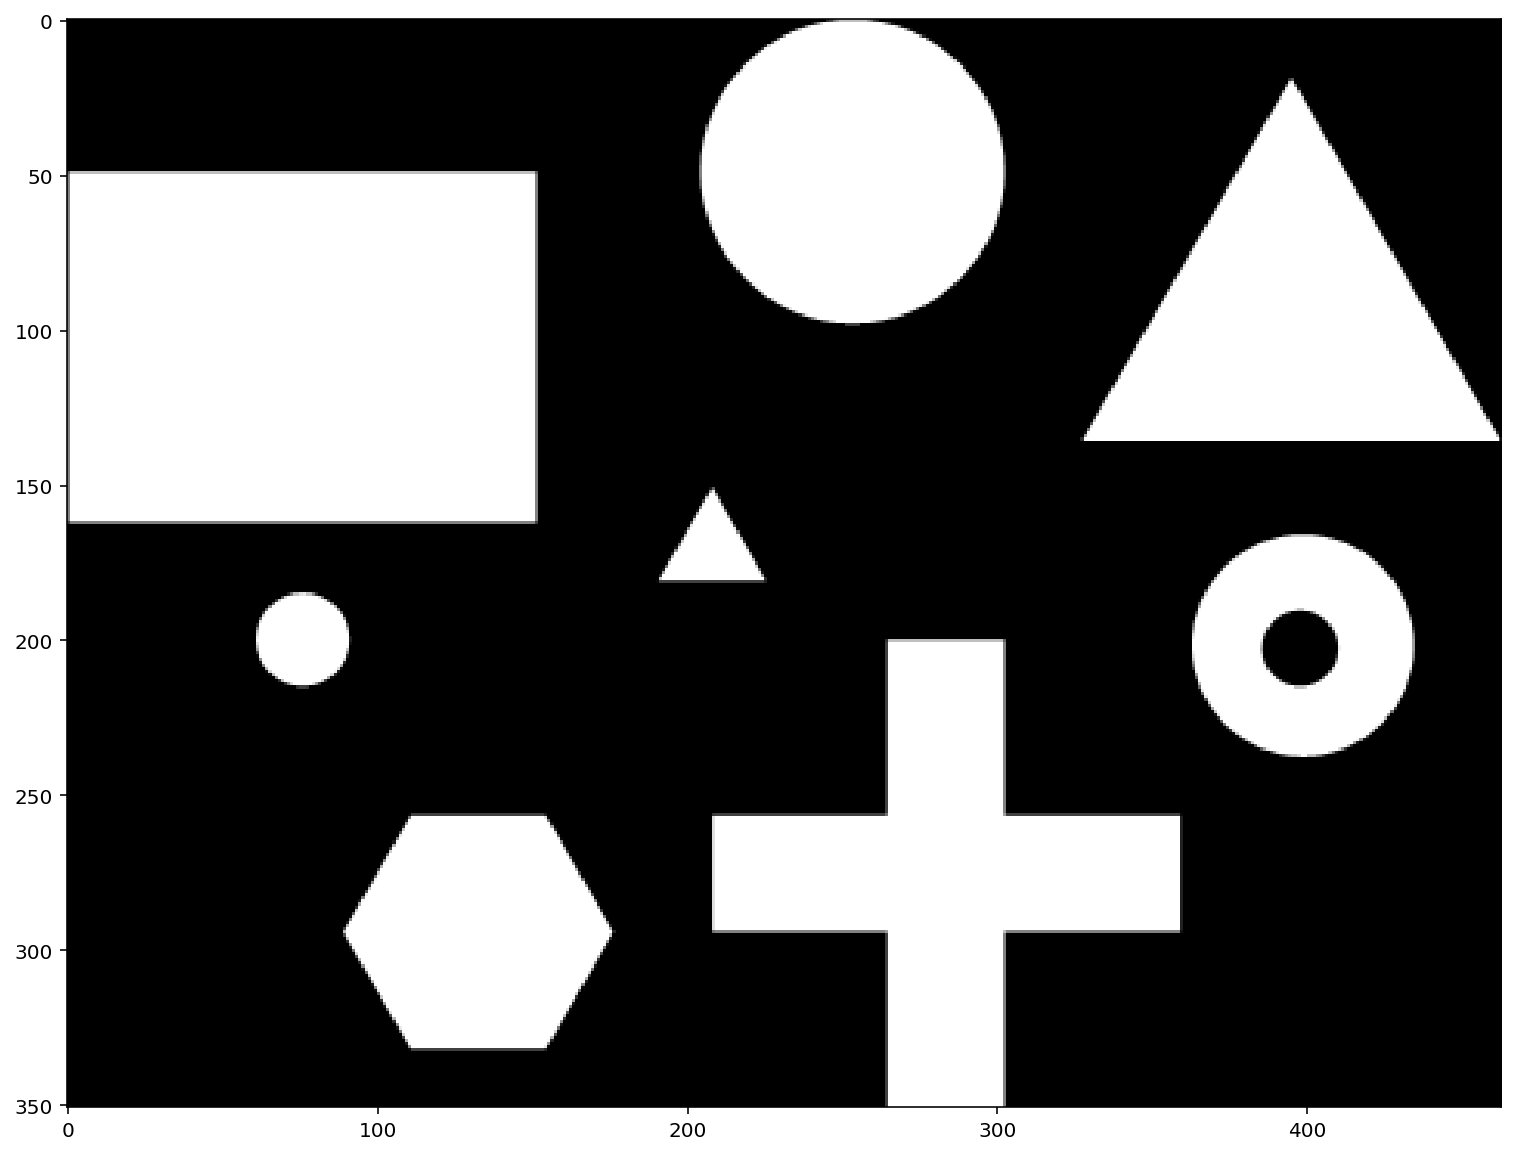

In [46]:
image = cv2.imread('images/Figuren.png')
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()


Wenden Sie die morphologischen Operationen dilate und erode mit verschiedenen Strukturelementen und verschiedenen Grössen an. Strukturelemente können mit der Funktion `getStructuringElement` erzeugt werden. Die OpenGL Implementation erlaube es auch die Operationen mit einem Aufruf mehrmals anzuwenden.

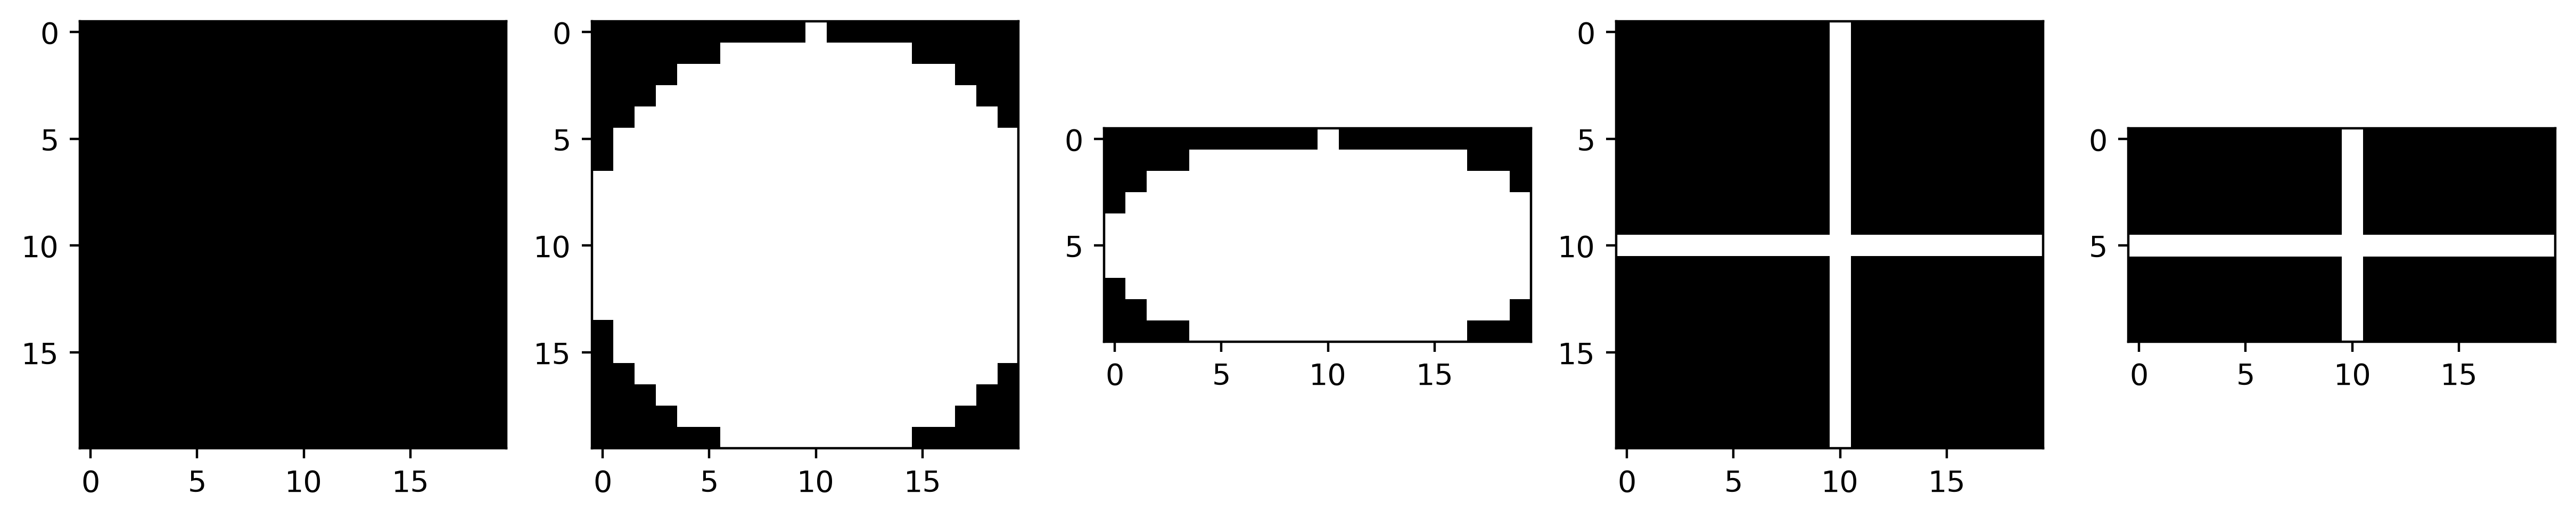

In [24]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 5, 1)
struct_rect = cv2.getStructuringElement(cv2.MORPH_RECT,(20,20))
plt.imshow(struct_rect, cmap='gray')
plt.subplot(1, 5, 2)
struct_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
plt.imshow(struct_ellipse, cmap='gray')
plt.subplot(1, 5, 3)
struct_ellipse_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,10))
plt.imshow(struct_ellipse_small, cmap='gray')
plt.subplot(1, 5, 4)
struct_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(20,20))
plt.imshow(struct_cross, cmap='gray')
plt.subplot(1, 5, 5)
struct_cross_small = cv2.getStructuringElement(cv2.MORPH_CROSS,(20,10))
plt.imshow(struct_cross_small, cmap='gray')
plt.show()



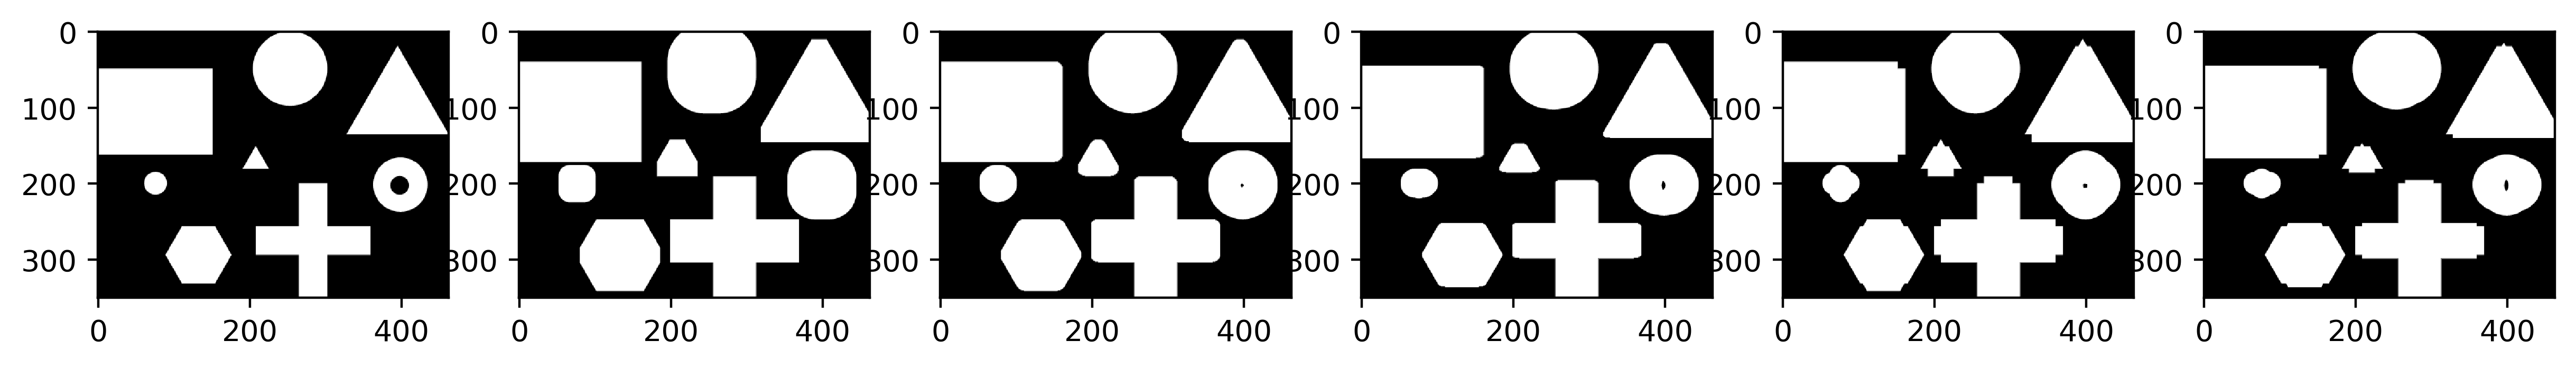

In [25]:
plt.figure(figsize=(15, 10))
plt.subplot(1,6,1)
plt.imshow(image)
plt.subplot(1,6,2)
image_dilate = cv2.dilate(image,struct_rect,iterations = 1)
plt.imshow(image_dilate)
plt.subplot(1,6,3)
image_dilate = cv2.dilate(image,struct_ellipse,iterations = 1)
plt.imshow(image_dilate)
plt.subplot(1,6,4)
image_dilate = cv2.dilate(image,struct_ellipse_small,iterations = 1)
plt.imshow(image_dilate)
plt.subplot(1,6,5)
image_dilate = cv2.dilate(image,struct_cross,iterations = 1)
plt.imshow(image_dilate)
plt.subplot(1,6,6)
image_dilate = cv2.dilate(image,struct_cross_small,iterations = 1)
plt.imshow(image_dilate)
plt.show()

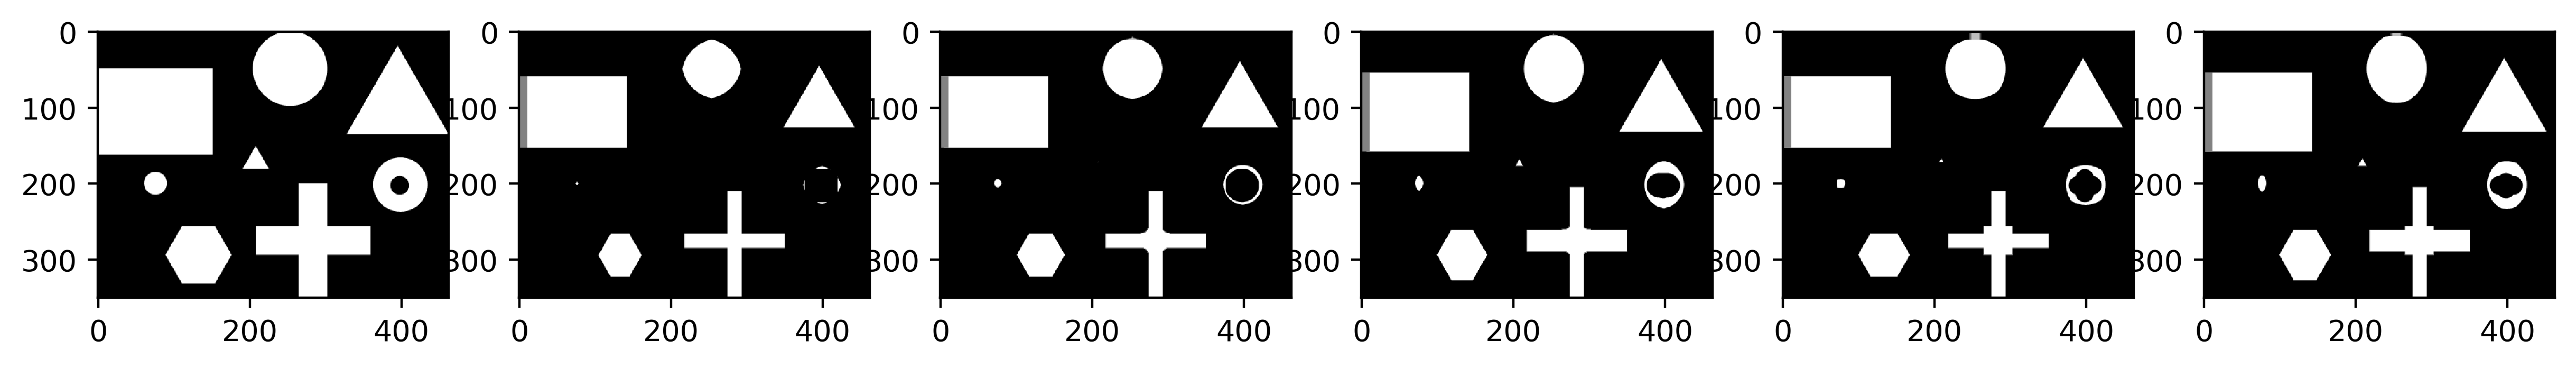

In [26]:
plt.figure(figsize=(15, 10))
plt.subplot(1,6,1)
plt.imshow(image)
plt.subplot(1,6,2)
image_erode = cv2.erode(image,struct_rect,iterations = 1)
plt.imshow(image_erode)
plt.subplot(1,6,3)
image_erode = cv2.erode(image,struct_ellipse,iterations = 1)
plt.imshow(image_erode)
plt.subplot(1,6,4)
image_erode = cv2.erode(image,struct_ellipse_small,iterations = 1)
plt.imshow(image_erode)
plt.subplot(1,6,5)
image_erode = cv2.erode(image,struct_cross,iterations = 1)
plt.imshow(image_erode)
plt.subplot(1,6,6)
image_erode = cv2.erode(image,struct_cross_small,iterations = 1)
plt.imshow(image_erode)
plt.show()

### Aufgabe 2.2: Opening/Closing


Für Opening und Closing kann in OpenCV die Funktion `morphologyEx` verwendet werden. Wie wirkt sich opening and closing auf das Beispielbild aus?

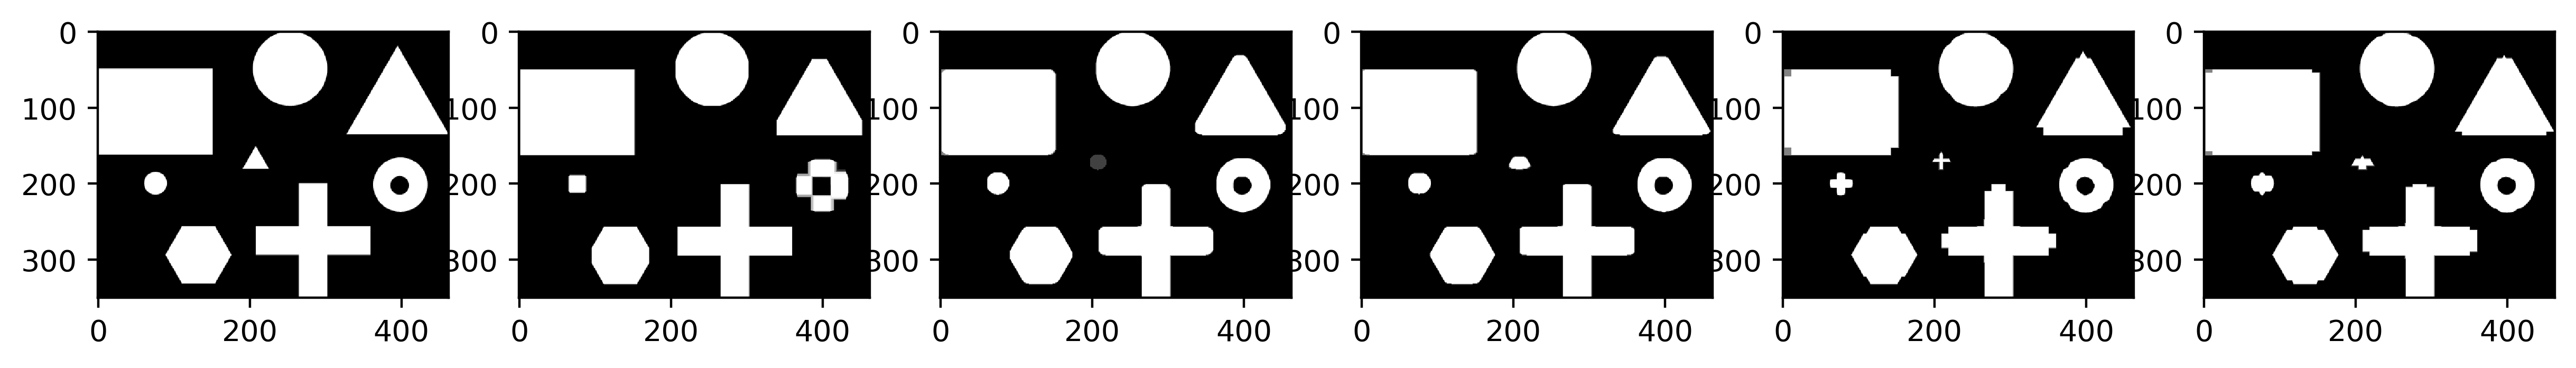

In [27]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 6, 1)
plt.imshow(image)
plt.subplot(1,6,2)
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_rect)
plt.imshow(image_open)  
plt.subplot(1, 6, 3)
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_ellipse)
plt.imshow(image_open)  
plt.subplot(1, 6, 4)
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_ellipse_small)
plt.imshow(image_open)  
plt.subplot(1, 6, 5)
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_cross)
plt.imshow(image_open)  
plt.subplot(1, 6, 6)
image_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct_cross_small)
plt.imshow(image_open)  
plt.show()



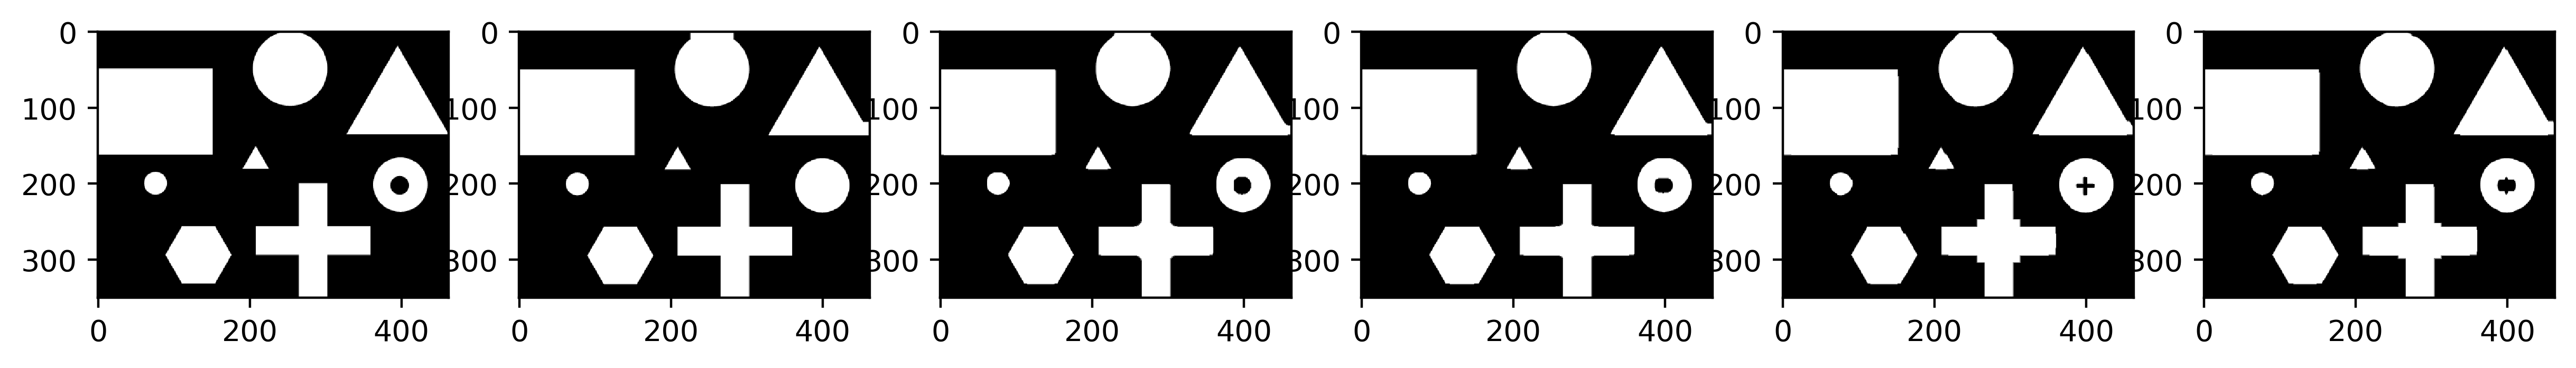

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 6, 1)
plt.imshow(image)
plt.subplot(1,6,2)
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct_rect)
plt.imshow(image_close)  
plt.subplot(1, 6, 3)
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct_ellipse)
plt.imshow(image_close)  
plt.subplot(1, 6, 4)
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct_ellipse_small)
plt.imshow(image_close)  
plt.subplot(1, 6, 5)
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct_cross)
plt.imshow(image_close)  
plt.subplot(1, 6, 6)
image_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct_cross_small)
plt.imshow(image_close)  
plt.show() 

### Aufgabe 2.3: Kugeln zählen

Finden Sie eine Sequenz von OpenCV Operationen die die Kugeln in folgenden Bild zählt? Als Ausgabe sollten sie dann also schlussendlich eine Zahl (zu Speichern in `nr_kugeln`) erhalten.

Hinweis: Beachten Sie dass die Kugeln schwarz auf hellem Hintergrund dargestellt sind.


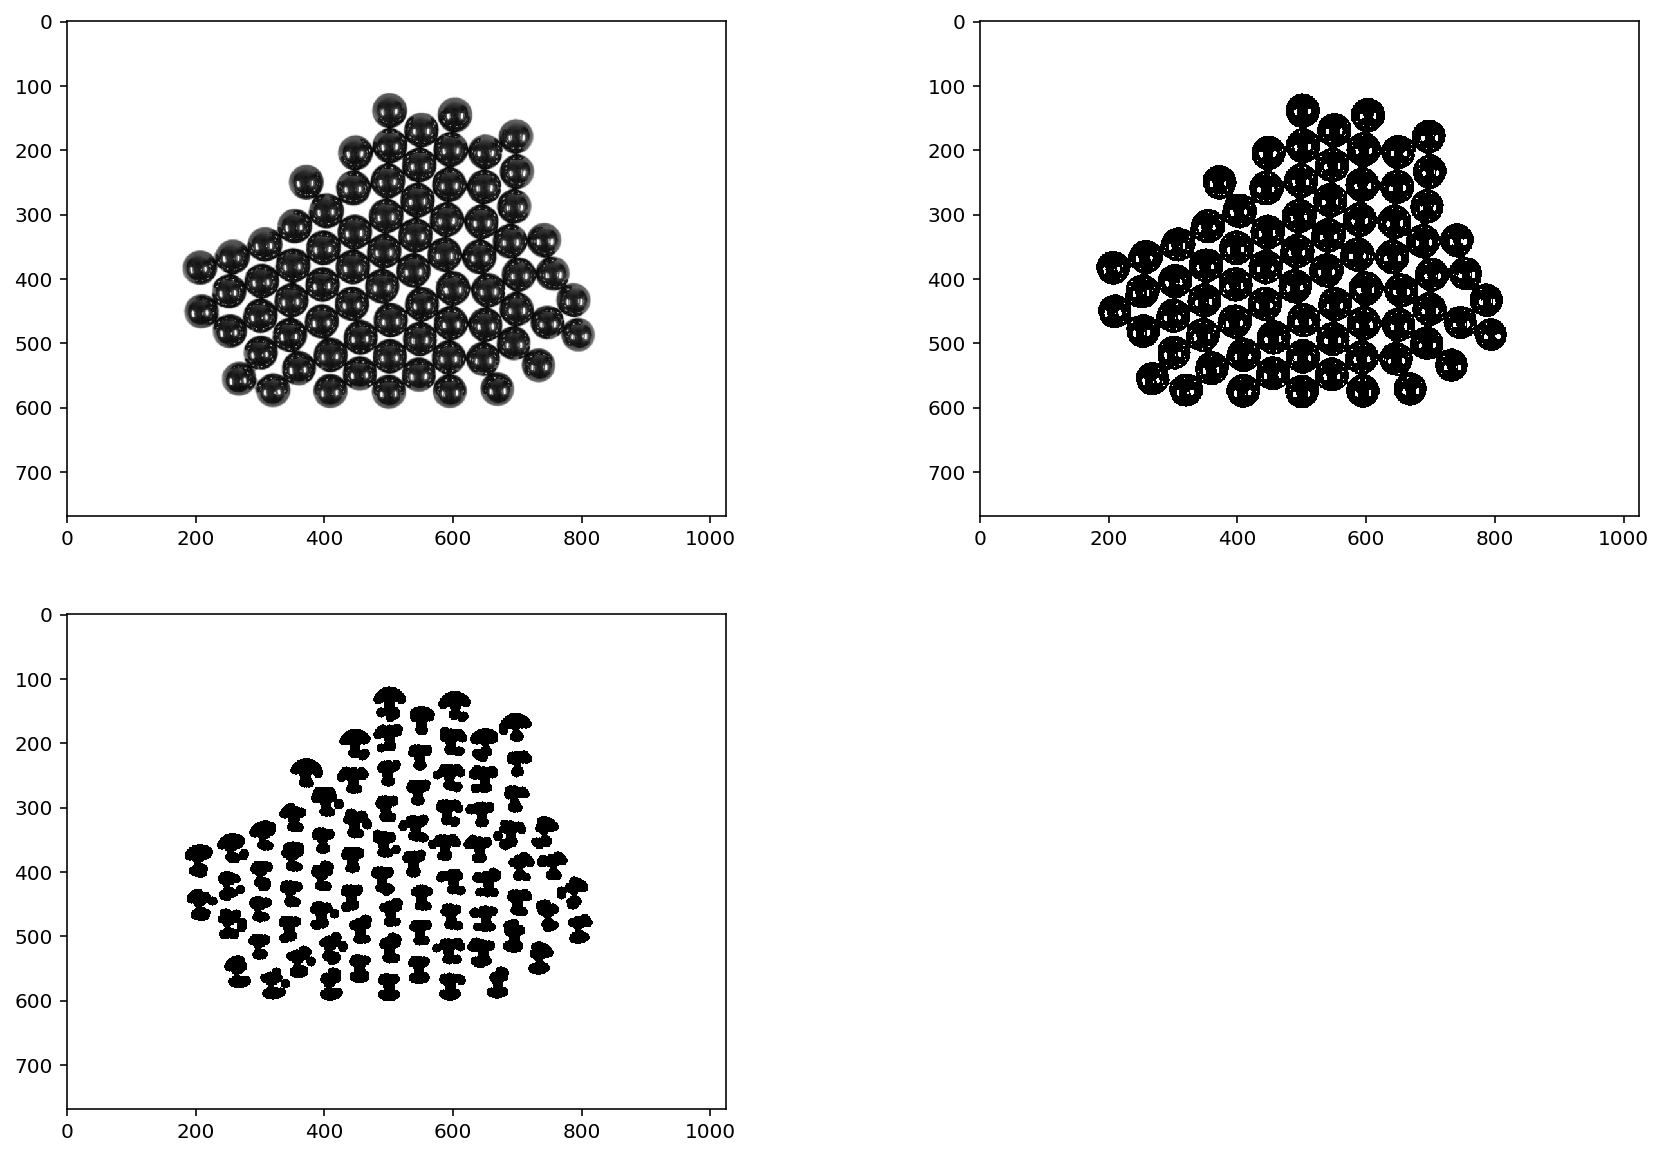

In [50]:
kugeln = cv2.imread('images/Kugeln.jpg', 0)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(kugeln, cmap="gray")

plt.subplot(222)
ret, kugeln_binary = cv2.threshold(kugeln, 127, 255, cv2.THRESH_BINARY)
plt.imshow(kugeln_binary, cmap="gray")

plt.subplot(223)
kugeln_closed = cv2.morphologyEx(kugeln_binary, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)))
plt.imshow(kugeln_closed, cmap="gray")
plt.show()


Anzahl Kugeln: 77


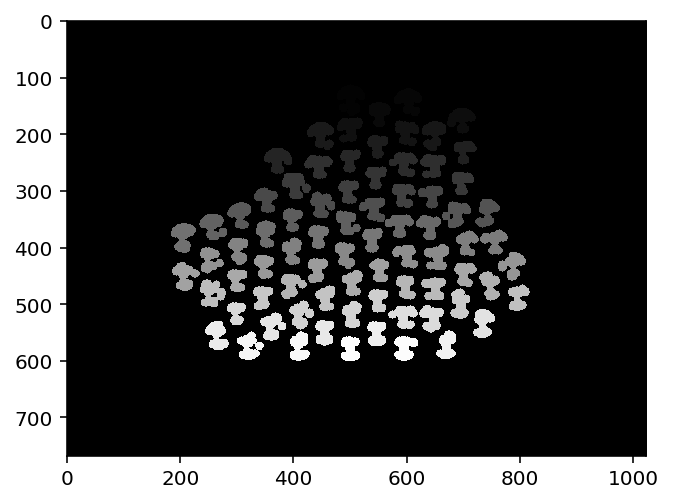

In [44]:
from skimage import measure

labels = measure.label(kugeln_closed, connectivity=None, background=255)
nr_kugeln = len(np.unique(labels))-1

print("Anzahl Kugeln:", nr_kugeln)

plt.imshow(labels, cmap='gray')
plt.show()

